In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Medicaldataset.csv")
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


# EDA

Here is a summary of the usual values of the features and  caracteristics of our dataset:

In [4]:
data.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


| **Parameter**                   | **Normal values**                                 | **Remarks**                                   |
|--------------------------------|-------------------------------------------------|----------------------------------------------|
| **Gender (Sex)**               | Male / Female                                    | Useful for interpreting certain biomarkers   |
| **Heart rate** (beats/min)     | 60 – 100 bpm                                    | < 60: bradycardia; > 100: tachycardia         |
| **Systolic blood pressure**    | 90 – 120 mmHg                                  | Hypertension if > 140 mmHg                     |
| **Diastolic blood pressure**   | 60 – 80 mmHg                                   | Hypertension if > 90 mmHg                      |
| **Blood sugar (fasting)**      | 70 – 99 mg/dL (0.7 – 1.1 g/L)                   | Diabetes if ≥ 126 mg/dL                         |
| **CK-MB**                     | < 5 ng/mL or < 5% of total CK                    | Elevated in case of cardiac damage (e.g. infarction) |
| **Troponin I**                | < 0.04 ng/mL                                   | Elevated = myocardial injury                   |
| **Troponin T**                | < 0.01 – 0.03 ng/mL                            | Elevated = myocardial injury                   |


We can notice that some values are extreme, for example, a heart rate of 1111 bpm, troponin at 10, and CK-MB at 300. Other variables have averages slightly above the normal ranges, but since we will be studying the risk of heart attacks, this will likely be relevant.

In [5]:
df = data[
    (data["Heart rate"] >= 40) & (data["Heart rate"] <= 200) &
    (data["Systolic blood pressure"] >= 70) & (data["Systolic blood pressure"] <= 220) &
    (data["Diastolic blood pressure"] >= 40) & (data["Diastolic blood pressure"] <= 130) &
    (data["Blood sugar"] >= 40) & (data["Blood sugar"] <= 400) &
    (data["CK-MB"] >= 0.3) & (data["CK-MB"] <= 100) &
    (data["Troponin"] >= 0.001) & (data["Troponin"] <= 5)
]

We therefore select a more restricted dataset. To obtain precise results, expert opinions would be necessary. We keep:

- Normal cases and legitimate pathological cases.

- Patients in acute conditions (e.g., infarction) without including data entry errors (e.g., 1111 bpm).

- A clean dataset to train a reliable supervised regression model.


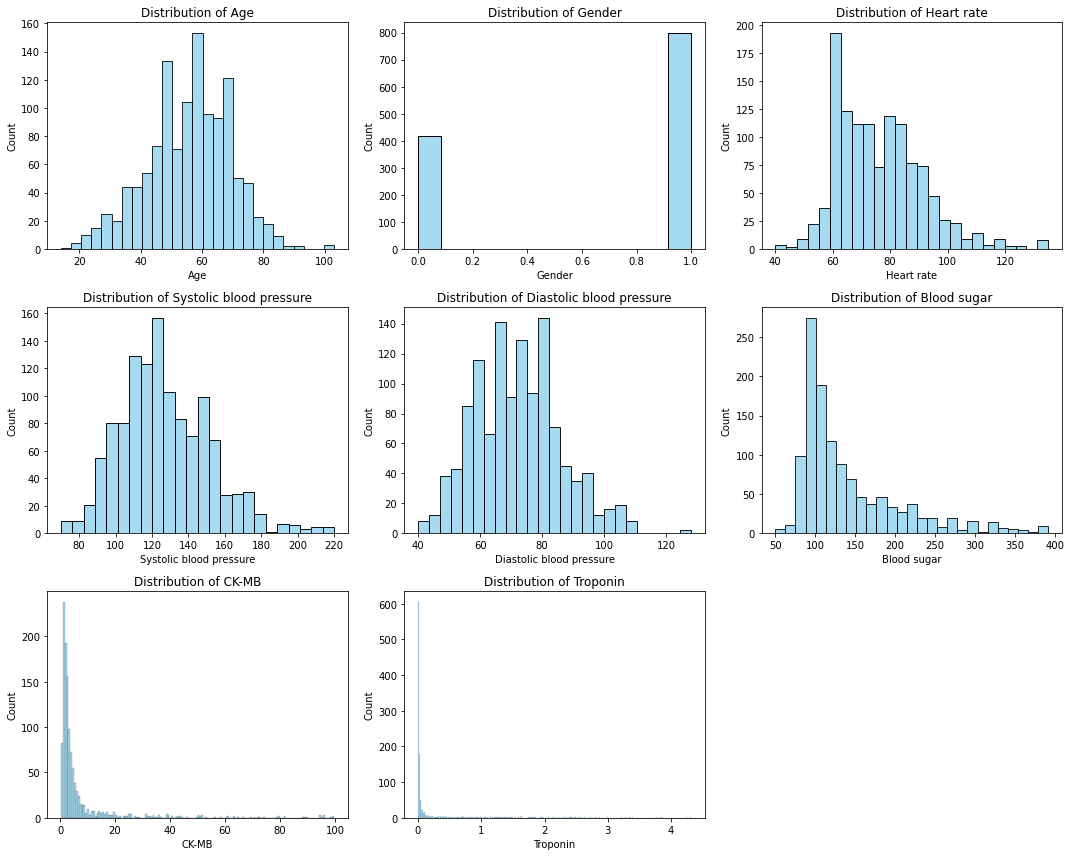

In [6]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

n = len(num_cols)
cols = 3 
rows = int(np.ceil(n / cols)) 

#3. Histograms

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()  

for i, col in enumerate(num_cols):
    sns.histplot(x=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {col}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


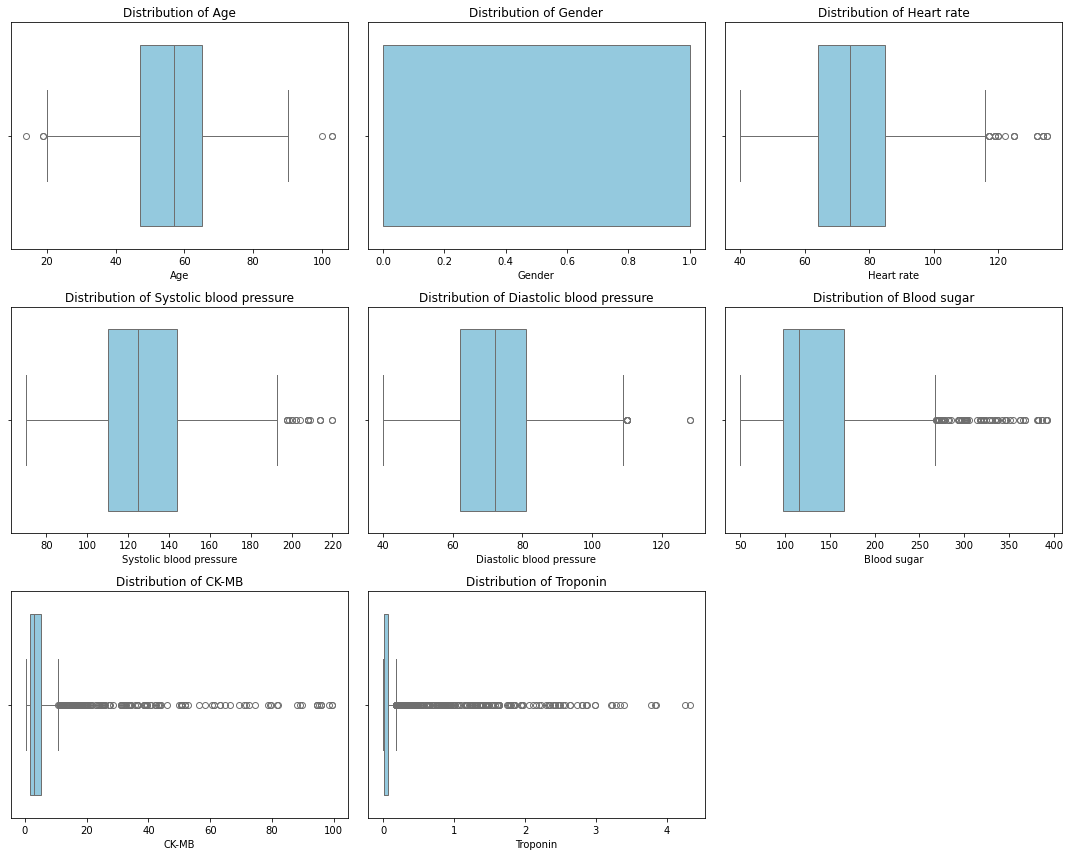

In [7]:
#4. Boxplots 

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {col}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


We can now see that there are fewer extreme values and that many of the values follow normal distributions. We will now examine whether the columns provide similar information by using a correlation matrix.

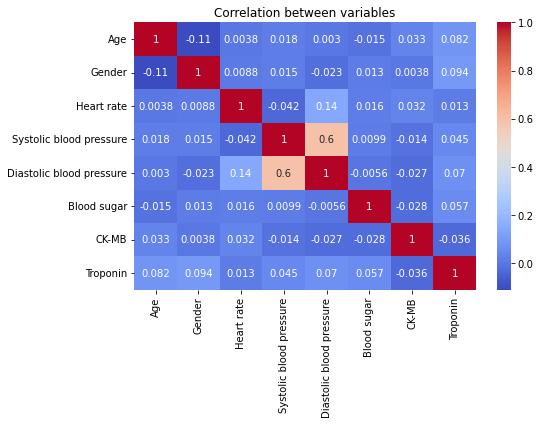

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between variables")
plt.tight_layout()
plt.show()

There are very few correlations except between the systolic and diastolic variables. We will later see if a single variable is sufficient, but for now, we will not remove either of the two variables.

We will now examine whether there are any obvious links between the outcome and the other variables.

In [9]:
df["Result"] = df["Result"].map({"negative": 0, "positive": 1})

/var/folders/49/ck8bc0m57zgd8z_xp3lj_w340000gn/T/ipykernel_25942/3031193172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Result"] = df["Result"].map({"negative": 0, "positive": 1})


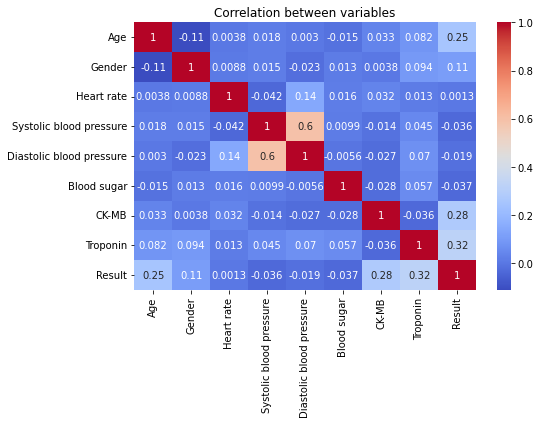

In [10]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between variables")
plt.tight_layout()
plt.show()

Three columns stand out somewhat: Age, CK-MB, and Troponin. We will later see if these same key variables are identified in the data model.

# Modeling
We will test three data models: first a logistic regression, which is suited for linear relationships, then a random forest to better capture nonlinear patterns, and finally an XGBoost model if none of the previous results prove interpretable.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [12]:
X = df.drop("Result", axis=1)
y = df["Result"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       145
           1       0.84      0.80      0.82       220

    accuracy                           0.79       365
   macro avg       0.78      0.78      0.78       365
weighted avg       0.79      0.79      0.79       365

AUC-ROC: 0.8779623824451411


The initial results are very encouraging as our model achieves an accuracy of 79%. Detection of sick patients is stronger than detection of healthy ones, which can be a good thing — it’s better to verify more than to overlook cases.

Details:

- Class 0 (healthy):

Precision = 0.72 → out of 100 patients predicted healthy, 72 are truly healthy.

Recall = 0.77 → out of 100 actual healthy patients, the model correctly detects 77.

F1-score = 0.74 → a balance between precision and recall.

- Class 1 (sick):

Precision = 0.84 → very good: few false positives.

Recall = 0.80 → also good: most sick patients are detected.

F1-score = 0.82 → excellent balance.





AUC-ROC: 0.878


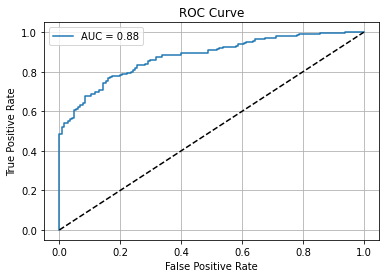

In [13]:
from sklearn.metrics import roc_auc_score, roc_curve

y_proba = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_proba)
print("AUC-ROC:", round(auc, 3))

# Draw AUC ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

Finally, the AUC-ROC score of 0.88 is very good. Our model quickly identifies many true positives compared to false positives.

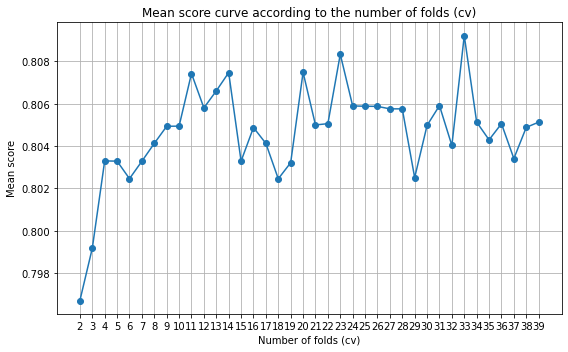

In [14]:
from sklearn.model_selection import cross_val_score

cv_range = list(range(2, 40))
mean_scores = []

for cv in cv_range:
    scores = cross_val_score(model, X, y, cv=cv)
    mean_scores.append(scores.mean())

plt.figure(figsize=(8, 5))
plt.plot(cv_range, mean_scores, marker='o')
plt.title("Mean score curve according to the number of folds (cv)")
plt.xlabel("Number of folds (cv)")
plt.ylabel("Mean score")
plt.grid(True)
plt.xticks(cv_range)
plt.tight_layout()
plt.show()

We can see that there is little change after 10 folds.

We will now perform a grid search to determine the best test size.

test_size=0.10 => F1-score: 0.8175
test_size=0.15 => F1-score: 0.8426
test_size=0.20 => F1-score: 0.8316
test_size=0.25 => F1-score: 0.8347
test_size=0.30 => F1-score: 0.8186
test_size=0.35 => F1-score: 0.8209
test_size=0.40 => F1-score: 0.8200
test_size=0.45 => F1-score: 0.8051
test_size=0.50 => F1-score: 0.8023
\Best test_size : 0.15 with a F1-score of 0.8426


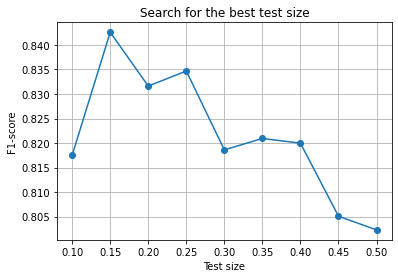

In [15]:
from sklearn.metrics import f1_score

test_sizes = np.linspace(0.1, 0.5, 9)  # test_size between 0.1 et 0.5 with a step of 0.05
scores = []

for ts in test_sizes:
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=11)
    
    # Training
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # F1 Score computation
    score = f1_score(y_test, y_pred)
    scores.append(score)
    print(f"test_size={ts:.2f} => F1-score: {score:.4f}")

# Best test_size
best_idx = np.argmax(scores)
print(f"\Best test_size : {test_sizes[best_idx]:.2f} with a F1-score of {scores[best_idx]:.4f}")

plt.plot(test_sizes, scores, marker='o')
plt.xlabel('Test size')
plt.ylabel('F1-score')
plt.title('Search for the best test size')

plt.grid(True)
plt.show()

On prend donc les nouvelles valeurs pour avoirles résultats finaux sur le modèle de regression logistic : 

In [16]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=11)

# LOgistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        73
           1       0.86      0.83      0.84       110

    accuracy                           0.81       183
   macro avg       0.81      0.81      0.81       183
weighted avg       0.82      0.81      0.81       183

AUC-ROC: 0.8792029887920298


Le modèle est légèrement meilleur dans toutes les catégories comparé au précédent. On va désormais utiliser une forêt aléatoire afin de voir si nous arrivons à de meilleurs résultats. 

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=11)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # for AUC ROC

print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        73
           1       0.96      0.97      0.97       110

    accuracy                           0.96       183
   macro avg       0.96      0.96      0.96       183
weighted avg       0.96      0.96      0.96       183

AUC-ROC: 0.9935865504358655


What we can directly conclude from these results is that the relationship within the data is not linear, as our random forest model captures the patterns in the data very well. We do not need to further optimize our model with cross-validation or a grid search.

The model is highly effective, with excellent precision and recall for both classes.

The AUC-ROC score of 0.99 indicates an excellent separation between sick and healthy patients.

There is a very good balance between precision and recall, which is ideal in a medical context where both false positives and false negatives must be avoided.

The final step I will take is to try to understand what allowed the model to achieve this recognition.

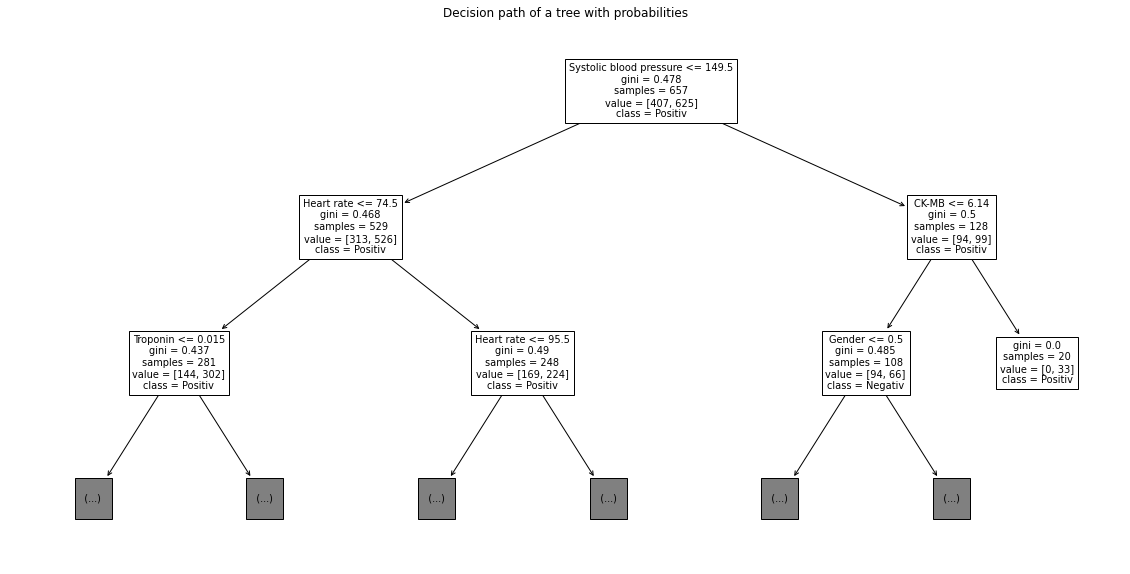

In [18]:
from sklearn.tree import plot_tree
# Choose the first tree
estimator = model.estimators_[0]

# Plot
plt.figure(figsize=(20, 10))
plot_tree(
    estimator,
    feature_names=X_train.columns,
    class_names=["Negativ", "Positiv"],
    max_depth=2              
)
plt.title("Decision path of a tree with probabilities")
plt.show()


If all observations in a node belong to the same class, then the Gini coefficient = 0 (best case).

For example, we can see that when systolic blood pressure is above 149.5 and CK-MB is above 6.14, a heart attack is systematic, representing 33 cases out of 1215 patients.